In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def plot(Xm, Pm, Ym):
    # Xm, Pm, Ym = Xm[:100], Pm[:100], Ym[:100]
    
    Pt = np.array([Pm[i, item] for i, item in enumerate(Ym)])
    p_diff = ((np.max(Pm, axis=1)).reshape(-1, 1) - Pt).flatten()    
    sorted_indices = np.argsort(p_diff)
    
    Xm = Xm[sorted_indices]
    Pm = Pm[sorted_indices]
    Ym = Ym[sorted_indices]
    
    fig, axes = plt.subplots(10, 20, figsize=(18, 10))
    axes = axes.flatten()
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
    for i, (xm, pm, ys) in enumerate(zip(Xm, Pm, Ym)):
        ax1, ax2 = axes[2*i], axes[2*i+1]
        ax1.imshow(xm.reshape(28, 28))
        ax2.bar(np.arange(10), pm)
        ax2.bar([np.argmax(pm)], [pm.max()], color="orange")
        ax2.bar(ys, pm[ys], color="red")
        ax2.text(-0.3, .85, str(ys), color="r", fontsize=8)
        ax2.text(7.1, .85, [np.argmax(pm)], color="orange", fontsize=8)
        ax2.set_ylim(0, 1)

    fig.tight_layout()
    
def sort(Xm, Pm, Ym):
    Pt = Pm

In [29]:
def top_n_error(n, Pm, Ym):
    misses = np.array([ym not in pm_indices 
                       for pm_indices, ym 
                       in zip(np.argsort(-Pm, axis=1)[:, :n], Ym)]).sum()
    return (misses / 10000) * 100

# CNN

In [49]:
results = np.load("results_cnn4.npz")
Pm, Xm, Ym = results["Pm"], results["Xm"], results["Ym"]
Ym = np.argmax(Ym, axis=1).reshape(-1, 1)
# Ym = Ym.reshape(-1, 1)

In [50]:
Ym.shape

(91, 1)

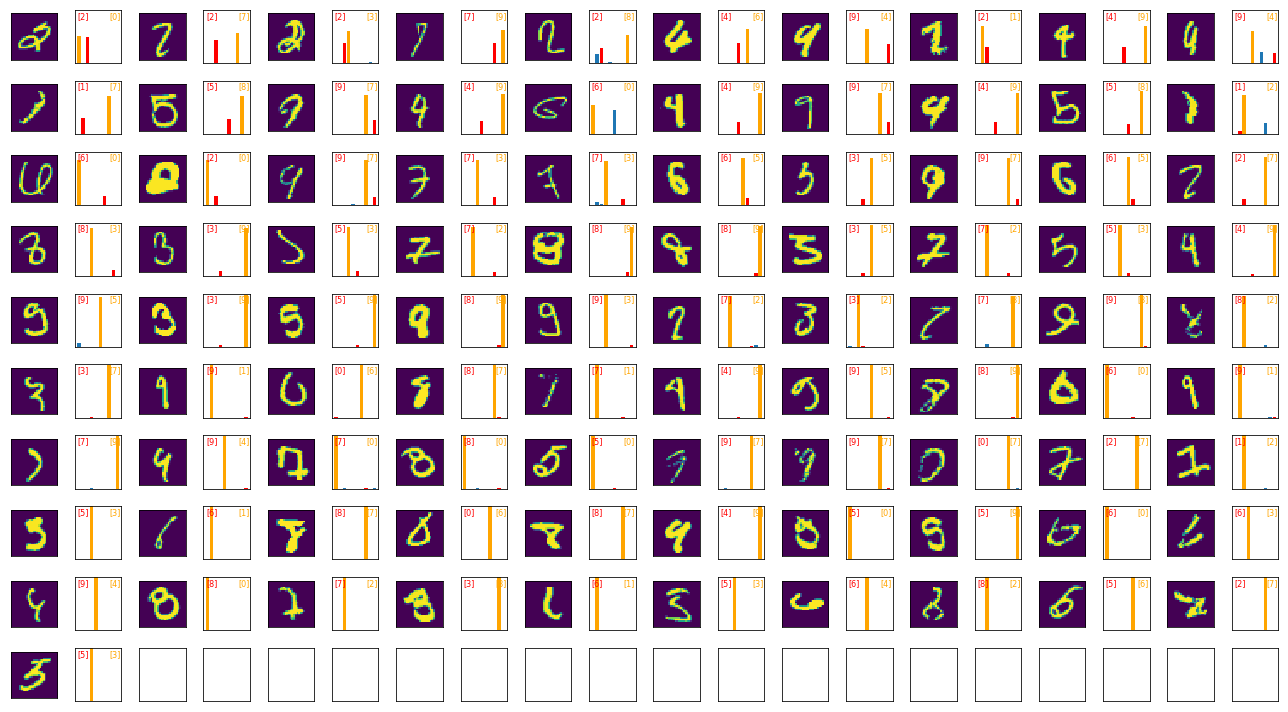

In [51]:
plot(Xm, Pm, Ym)
# plt.savefig("cnn_tf_tutorial_mnist_misclassified.pdf")
plt.show()

In [52]:
print(top_n_error(1, Pm, Ym))
print(top_n_error(2, Pm, Ym))
print(top_n_error(3, Pm, Ym))

0.91
0.19
0.06


# Indexed Conv GP

In [46]:
results = np.load("weighted_conv_gp_results.npz")
Pm, Xm, Ym = results["Pm"], results["Xm"], results["Ym_true"]

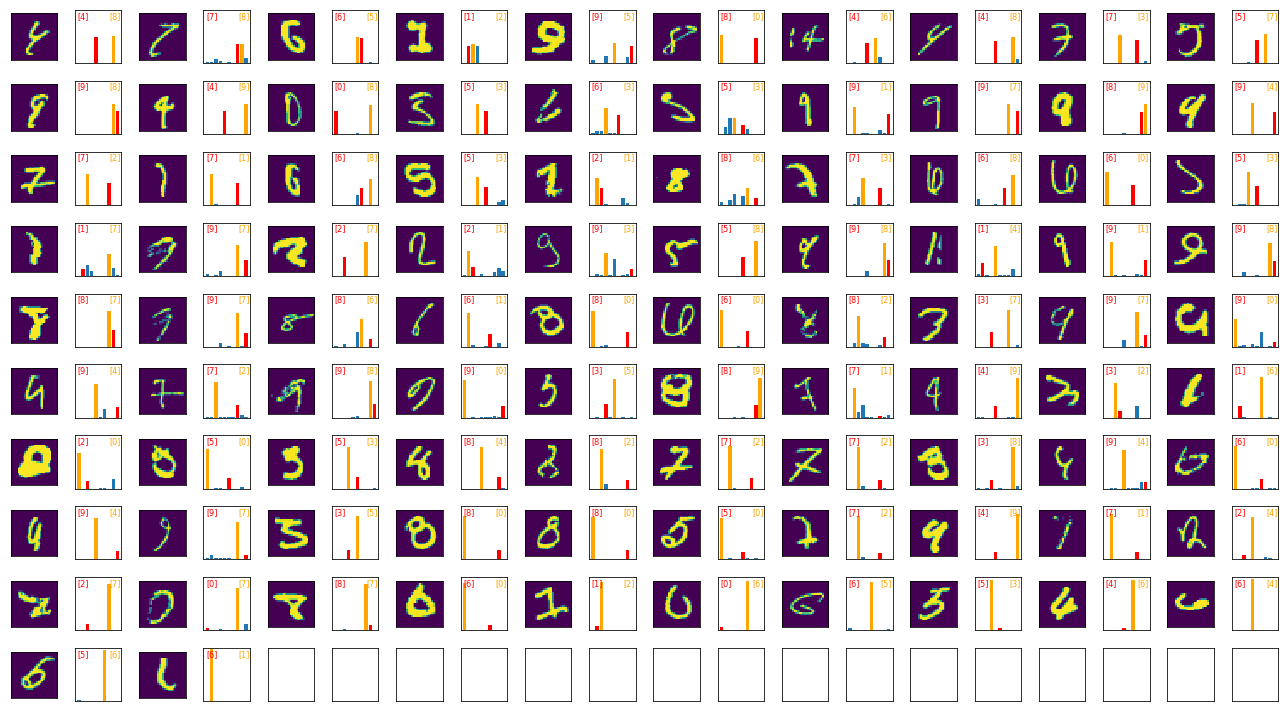

In [47]:
plot(Xm, Pm, Ym)
# plt.savefig("convgp_mnist_misclassified.pdf")
plt.show()

In [48]:
print(top_n_error(1, Pm, Ym))
print(top_n_error(2, Pm, Ym))
print(top_n_error(3, Pm, Ym))

0.9199999999999999
0.13
0.05
